<a href="https://colab.research.google.com/github/Jessesantoz/DadosEnem2022/blob/main/Dados_Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DADOS ENEM 2022

dados retirados do site do Inep

In [ ]:
import pandas as pd
import matplotlib

In [ ]:
dadosEnem = pd.read_csv("/content/drive/MyDrive/Dados/microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv", sep=";", encoding = "ISO-8859-1")

dadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [ ]:
dadosEnem.shape

(3476105, 76)

In [ ]:
dadosEnem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

# Utilizando Bibliotecas para entender o gabarito das pesquisas:

In [ ]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [ ]:
microDados = dadosEnem.filter(items=colunasSelecionadas)

In [ ]:
microDados.shape

(3476105, 5)

In [ ]:
microDados = microDados.dropna()

In [ ]:
microDados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
2,210057280536,565.3,760.0,E,F
3,210055724397,416.0,320.0,C,A
7,210055778089,404.9,440.0,E,E
9,210055461467,435.3,360.0,E,E
11,210054972570,456.8,940.0,E,E


In [ ]:
q001le002Dicionario = {
"A": "Nunca estudou",
"B":"Não completou a 4ª série/5º ano do Ensino Fundamental",
"C":"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
"D":"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
"E":"Completou o Ensino Médio, mas não completou a Faculdade",
"F":"Completou a Faculdade, mas não completou a Pós-graduação",
"G":"Completou a Pós-graduação",
"H":"Não sei"}



In [ ]:
q001le002Dicionario

{'A': 'Nunca estudou',
 'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
 'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
 'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
 'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
 'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
 'G': 'Completou a Pós-graduação',
 'H': 'Não sei'}

In [ ]:
intensSelecionados = microDados.filter(items=['NU_INSCRICAO','Q001']).groupby(['Q001']).count()

In [ ]:
intensSelecionados

,NU_INSCRICAO
Q001,
A,75867
B,350284
C,291859
D,259673
E,720913
F,250540
G,193050
H,202637


Criando uma nova coluna = usando as respostas do dicionério para gerar a lista de respotas da coluna, segundo  o gabarito.

In [ ]:
microDados['NO_001'] = [q001le002Dicionario[resp] for resp in microDados.Q001]

In [ ]:
microDados['NO_002'] = [q001le002Dicionario[resp] for resp in microDados.Q002]

In [ ]:
microDados.tail()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_001,NO_002
3476095,210057138057,423.6,580.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
3476097,210055398098,596.3,740.0,H,C,Não sei,"Completou a 4ª série/5º ano, mas não completou..."
3476098,210055668087,597.4,580.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ..."
3476099,210055303118,432.0,520.0,C,B,"Completou a 4ª série/5º ano, mas não completou...",Não completou a 4ª série/5º ano do Ensino Fund...
3476102,210056699189,637.1,660.0,E,C,"Completou o Ensino Médio, mas não completou a ...","Completou a 4ª série/5º ano, mas não completou..."


In [ ]:
respostas001 = microDados.filter(items=['NU_INSCRICAO', 'NO_001']).groupby(['NO_001']).count().sort_values(by='NU_INSCRICAO', ascending=False)

In [ ]:
respostas002 = microDados.filter(items=['NU_INSCRICAO', 'NO_002']).groupby(['NO_002']).count().sort_values(by='NU_INSCRICAO', ascending=False)

In [ ]:
respostas001

,NU_INSCRICAO
NO_001,
"Completou o Ensino Médio, mas não completou a Faculdade",720913
Não completou a 4ª série/5º ano do Ensino Fundamental,350284
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",291859
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",259673
"Completou a Faculdade, mas não completou a Pós-graduação",250540
Não sei,202637
Completou a Pós-graduação,193050
Nunca estudou,75867


In [ ]:
respostas002

,NU_INSCRICAO
NO_002,
"Completou o Ensino Médio, mas não completou a Faculdade",851162
"Completou a Faculdade, mas não completou a Pós-graduação",329384
Completou a Pós-graduação,322603
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",262334
Não completou a 4ª série/5º ano do Ensino Fundamental,238683
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",232165
Não sei,62486
Nunca estudou,46006


Troca do indice: de número de inscrição para a nota da redação (para perceber os padrões de respostas frenquentes entre as notas alcançadas)

In [ ]:
respostas001 = microDados.filter(items=['NU_NOTA_REDACAO', 'NO_001']).groupby(['NO_001']).count().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [ ]:
respostas001

,NU_NOTA_REDACAO
NO_001,
"Completou o Ensino Médio, mas não completou a Faculdade",720913
Não completou a 4ª série/5º ano do Ensino Fundamental,350284
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",291859
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",259673
"Completou a Faculdade, mas não completou a Pós-graduação",250540
Não sei,202637
Completou a Pós-graduação,193050
Nunca estudou,75867


In [ ]:
respostas002 = microDados.filter(items=['NU_NOTA_REDACAO', 'NO_002']).groupby(['NO_002']).count().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [ ]:
respostas002

,NU_NOTA_REDACAO
NO_002,
"Completou o Ensino Médio, mas não completou a Faculdade",851162
"Completou a Faculdade, mas não completou a Pós-graduação",329384
Completou a Pós-graduação,322603
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",262334
Não completou a 4ª série/5º ano do Ensino Fundamental,238683
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",232165
Não sei,62486
Nunca estudou,46006


Acrescimo da coluna referente ao Estado do participante.

In [ ]:
microDados['SG_UF_ESC'] = dadosEnem.SG_UF_ESC

In [ ]:
microDados.dropna()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_001,NO_002,SG_UF_ESC
40,210056717205,430.4,560.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,CE
55,210056012033,905.5,900.0,D,F,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou a Faculdade, mas não completou a Pós...",SP
57,210056292241,551.9,740.0,C,D,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,GO
59,210054772114,433.6,520.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",PA
67,210055580862,438.0,540.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",RJ
...,...,...,...,...,...,...,...,...
3476074,210056744855,449.9,560.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",RS
3476086,210056738981,492.0,580.0,D,E,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ...",RS
3476093,210055806830,544.6,560.0,E,F,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós...",RJ
3476098,210055668087,597.4,580.0,H,E,Não sei,"Completou o Ensino Médio, mas não completou a ...",MG


1 - método: where (trabalha apenas com as linhas que contém a string apresentada como parametro)

In [ ]:
respostas002SC = microDados.filter(items=['NU_NOTA_REDACAO', 'NO_002']).where(microDados.SG_UF_ESC == 'SC').groupby(['NO_002']).count()\
.sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [ ]:
respostas002SC

,NU_NOTA_REDACAO
NO_002,
"Completou o Ensino Médio, mas não completou a Faculdade",8262
Completou a Pós-graduação,4757
"Completou a Faculdade, mas não completou a Pós-graduação",3704
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",2639
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",1946
Não completou a 4ª série/5º ano do Ensino Fundamental,1250
Não sei,464
Nunca estudou,43


2 - Groupby com dois termos

In [ ]:
respostas002Estados = microDados.filter(items=['NU_NOTA_REDACAO', 'SG_UF_ESC', 'NO_002']).groupby(['SG_UF_ESC', 'NO_002']).mean()

In [ ]:
respostas002Estados

NU_NOTA_REDACAO
SG_UF_ESC NO_002                                                             
AC        Completou a 4ª série/5º ano, mas não completou ...       548.363636
          Completou a 8ª série/9º ano do Ensino Fundament...       552.696246
          Completou a Faculdade, mas não completou a Pós-...       663.745020
          Completou a Pós-graduação                                715.263158
          Completou o Ensino Médio, mas não completou a F...       600.564263
...                                                                       ...
TO        Completou a Pós-graduação                                684.520397
          Completou o Ensino Médio, mas não completou a F...       587.686567
          Nunca estudou                                            502.500000
          Não completou a 4ª série/5º ano do Ensino Funda...       478.796992
          Não sei                                                  529.323308

[216 rows x 1 columns]

3 - Utilizar o matplotlib para visualizar essas informações em forma de gráfico

# Criando Gráficos com MatPlotLib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ax = microDados.filter(items=['SG_UF_ESC', 'Q002', 'NU_NOTA_REDACAO']).where(microDados.Q002 != 'H').groupby(['Q002', 'SG_UF_ESC']).mean()\
.sort_values(by='NU_NOTA_REDACAO', ascending=False).unstack()

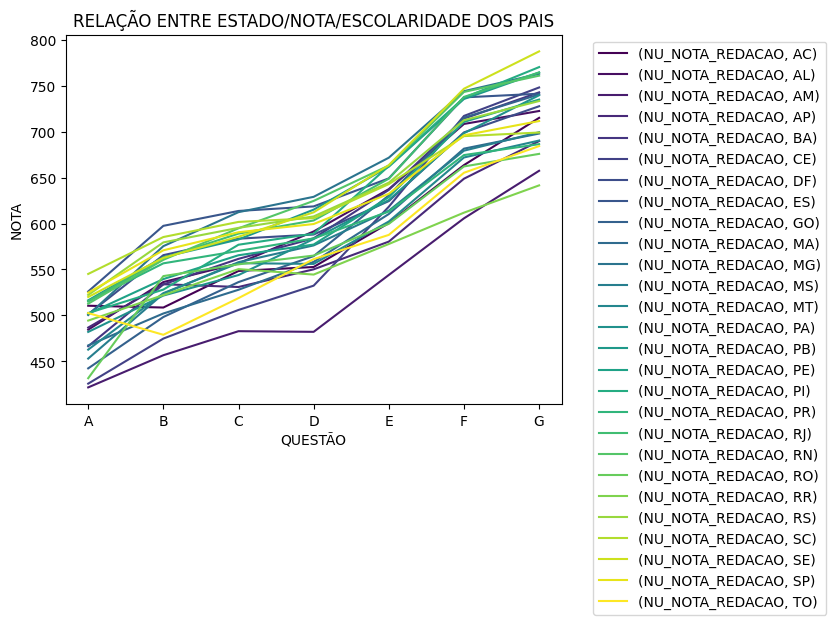

In [ ]:
ax.plot(colormap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0)
plt.rcParams['figure.figsize'] = (15, 10)
plt.title ('RELAÇÃO ENTRE ESTADO/NOTA/ESCOLARIDADE DOS PAIS')
plt.ylabel('NOTA')
plt.xlabel('QUESTÃO')
plt.show()


In [ ]:
respostas1 = microDados.filter(items=['NU_INSCRICAO','NU_NOTA_REDACAO', 'Q001']).groupby(['Q001', 'NU_NOTA_REDACAO']).count()\
.sort_values(by='NU_NOTA_REDACAO', ascending=False).unstack()

respostas2 = microDados.filter(items=['NU_INSCRICAO','NU_NOTA_REDACAO', 'Q002']).groupby(['Q002', 'NU_NOTA_REDACAO']).count()\
.sort_values(by='NU_NOTA_REDACAO', ascending=False)

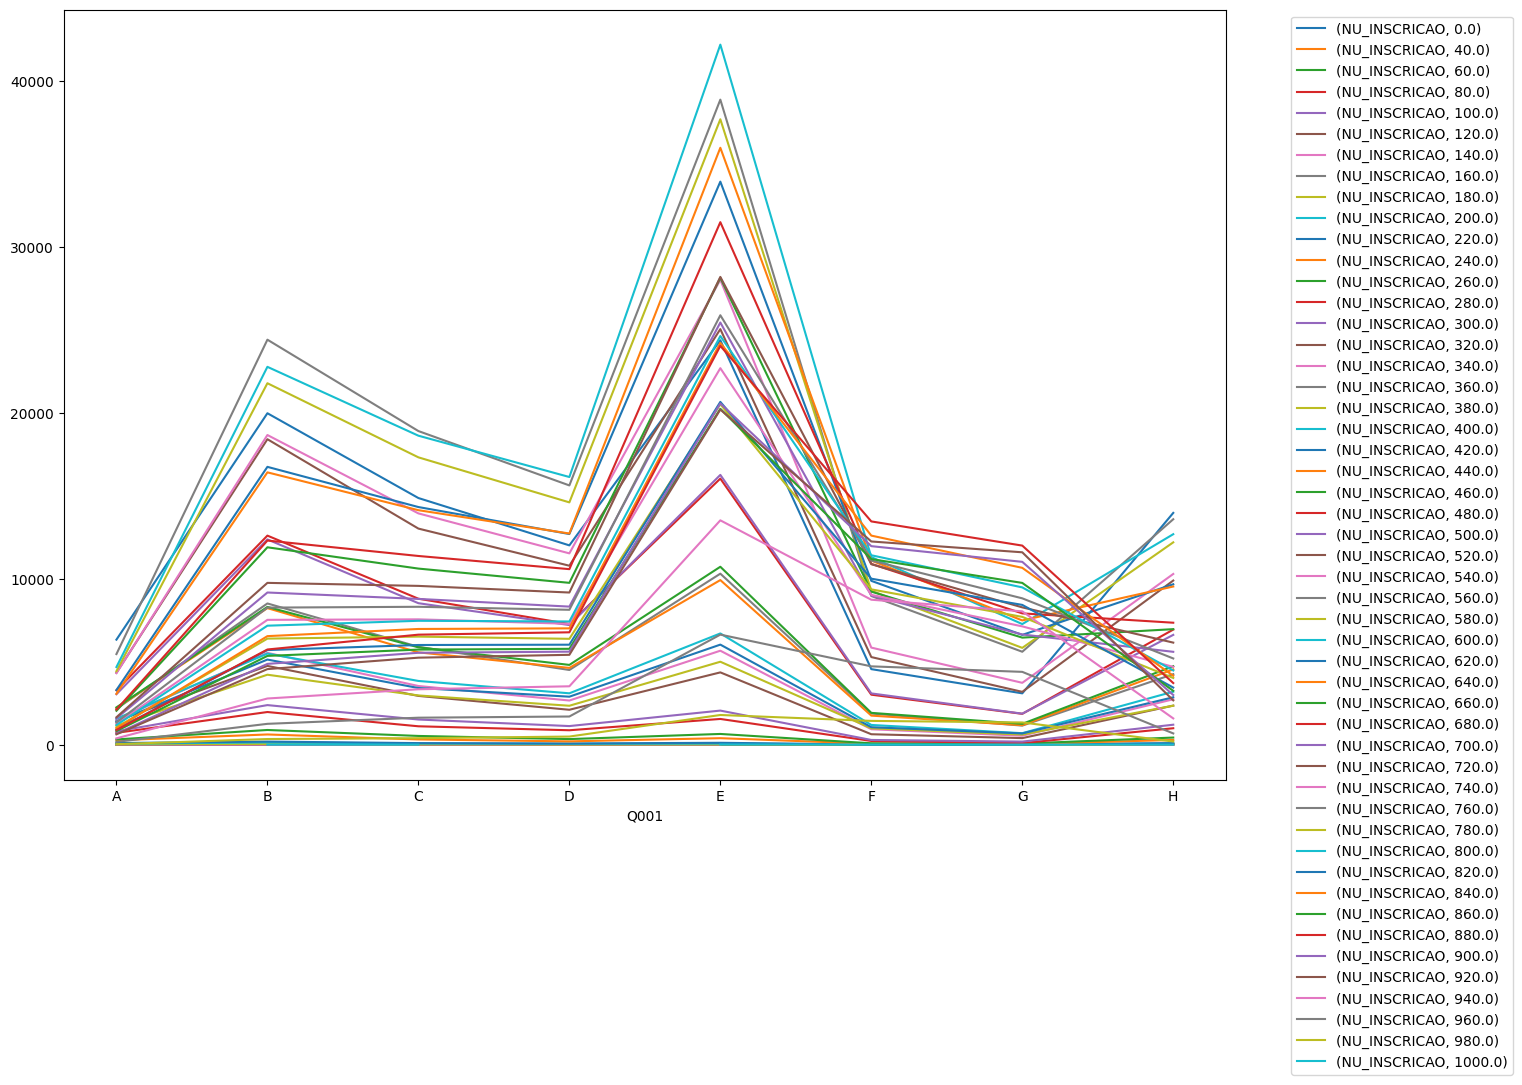

In [ ]:
respostas1.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=0)
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [ ]:
microDados['TP_COR_RACA'] = dadosEnem.TP_COR_RACA

In [ ]:
microDados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_001,NO_002,SG_UF_ESC,TP_COR_RACA
2,210057280536,565.3,760.0,E,F,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós...",NaN,2
3,210055724397,416.0,320.0,C,A,"Completou a 4ª série/5º ano, mas não completou...",Nunca estudou,NaN,3
7,210055778089,404.9,440.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",NaN,2
9,210055461467,435.3,360.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",NaN,3
11,210054972570,456.8,940.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ...",NaN,1


In [ ]:
microDados = microDados.dropna()

In [ ]:
dicionarioCor = {
0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indígena',
6:'Não dispõe da informação'
}


In [ ]:
dicionarioCor

{0: 'Não declarado',
 1: 'Branca',
 2: 'Preta',
 3: 'Parda',
 4: 'Amarela',
 5: 'Indígena',
 6: 'Não dispõe da informação'}

In [ ]:
intensCorSelecionados = microDados.filter(items=['NU_INSCRICAO','TP_COR_RACA']).groupby(['TP_COR_RACA']).count()

In [ ]:
intensCorSelecionados

,NU_INSCRICAO
TP_COR_RACA,
0,12151
1,331967
2,63266
3,270768
4,11715
5,3048


array([[<Axes: title={'center': 'NU_INSCRICAO'}>]], dtype=object)

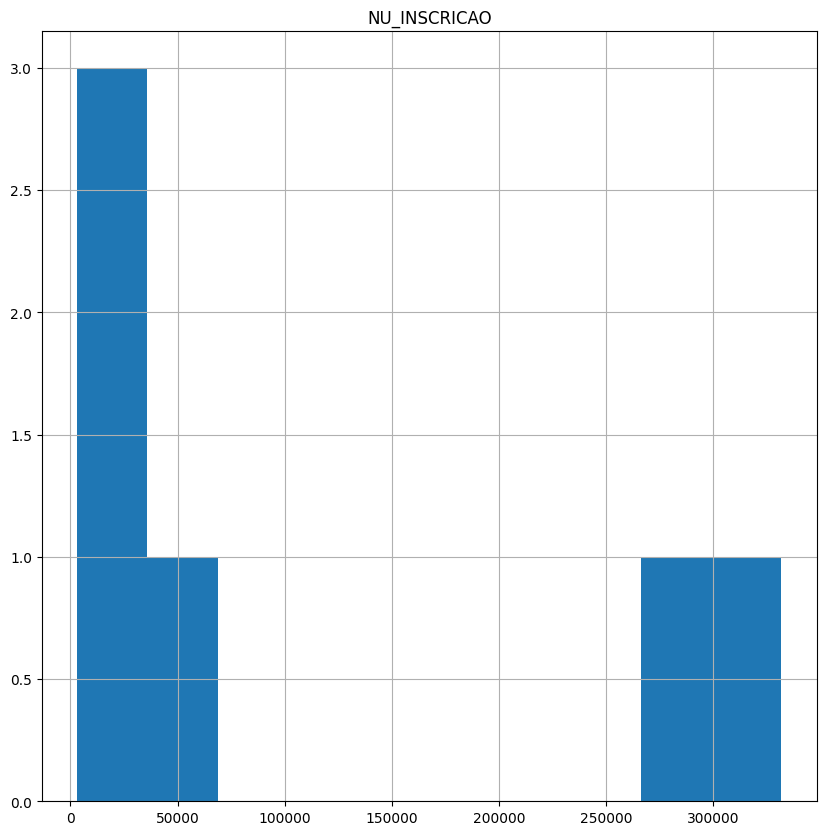

In [ ]:
intensCorSelecionados.hist()

In [ ]:
microDados['Etnia'] = [dicionarioCor[resp] for resp in microDados.TP_COR_RACA]

In [ ]:
grafCor = microDados.filter(items=['Etnia', 'Q002', 'NU_NOTA_REDACAO']).where(microDados.Q002 != 'H').groupby(['Q002', 'Etnia']).mean()\
.sort_values(by='NU_NOTA_REDACAO', ascending=False).unstack()

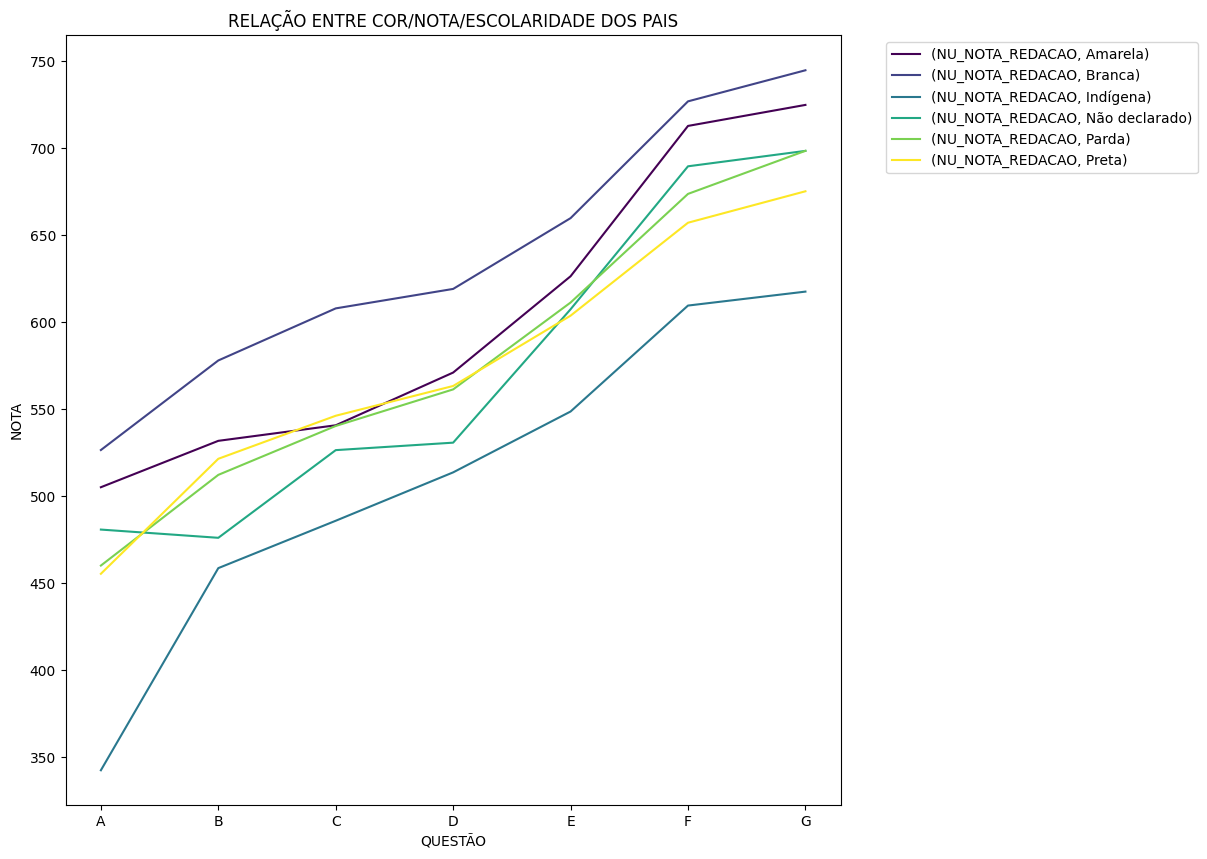

In [ ]:
grafCor.plot(colormap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0)
plt.rcParams['figure.figsize'] = (10, 10)
plt.title ('RELAÇÃO ENTRE COR/NOTA/ESCOLARIDADE DOS PAIS')
plt.ylabel('NOTA')
plt.xlabel('QUESTÃO')
plt.show()